## About the dataset

The dataset comprises credit card transactions in September 2013, with 492 frauds out of 284,807 transactions (0.172% fraud rate). It includes numerical features resulting from PCA, except for 'Time' and 'Amount'. 'Time' represents seconds since the first transaction, and 'Amount' is the transaction amount. The target variable 'Class' is 1 for fraud, 0 otherwise.

Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Problem Statement

To predict whether transaction is fraud(class 1) or not(class 0)

## Importing all necessary libraries for data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Processing

In [2]:
#Reading CSV file
credit_data=pd.read_csv("creditcard.csv")

#Printing first 5 rows of the data
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Checking for the rows and columns
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset consists of approximately 3,00,000 rows and 31 columns, primarily containing float datatype.

In [4]:
#Checking for missing values
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values

In [5]:
#Checking for duplicate values
credit_data.duplicated().sum()

1081

In [6]:
#Dropping duplicate values
credit_data.drop_duplicates(inplace=True)

In [7]:
credit_data.shape

(283726, 31)

In [8]:
#Checking for value counts and unique values
print("Time:- ")
print(credit_data["Time"].value_counts().unique())

print("\n   ---------------------------------------------------   \n")

print("Amount:- ")
print(credit_data["Amount"].value_counts().unique())

Time:- 
[21 20 19 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1]

   ---------------------------------------------------   

Amount:- 
[13566  6044  4871  4738  3280  2977  2948  2892  2623  2304  2000  1811
  1808  1739  1579  1564  1443  1436  1385  1338  1239  1088  1011   974
   946   941   904   895   877   875   845   839   821   818   751   718
   704   703   692   667   655   650   638   622   614   608   572   563
   531   524   503   502   493   492   491   482   478   477   470   452
   451   444   439   437   427   421   414   409   404   400   389   387
   375   368   365   364   357   356   355   354   352   351   350   348
   343   341   339   330   327   326   316   315   313   305   296   287
   286   281   280   279   278   276   275   274   273   272   271   268
   266   265   259   258   254   252   248   247   246   238   234   232
   228   224   220   213   212   211   209   208   206   205   203   201
   196   192   190   189   188   187   186   185   184   

## Analysing data through different graphs

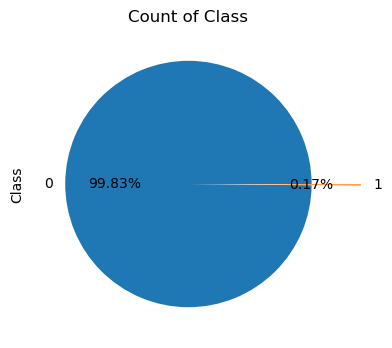

In [9]:
#Count of Class
plt.figure(figsize=(5,4))
credit_data["Class"].value_counts().plot.pie(autopct='%1.2f%%',explode=(0,0.4))
plt.title("Count of Class")
plt.show()

The data has a fraud rate of only 0.17%.

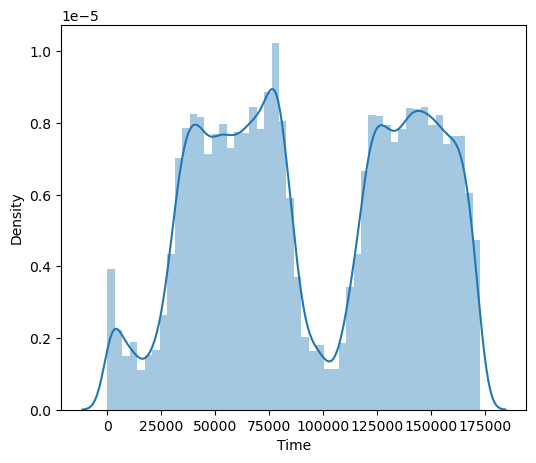

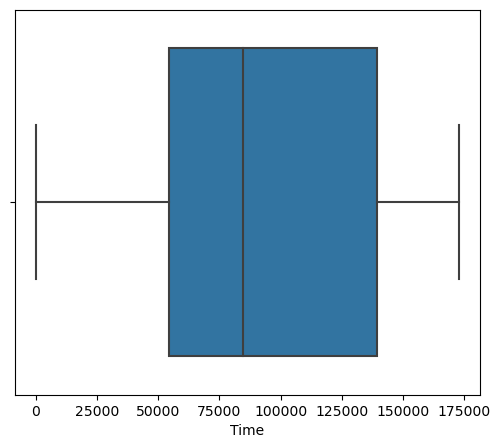

In [10]:
plt.figure(figsize=(6,5))
sns.distplot(credit_data["Time"])
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(credit_data["Time"])
plt.show()

## Separating X and Y

In [11]:
x=credit_data.iloc[:,:-1]
y=credit_data["Class"]

In [12]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


## Splitting the data into train test split

In [13]:
#Import train_test_split
from sklearn.model_selection import train_test_split

#Split the data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)

In [14]:
print(x.shape,xtrain.shape,xtest.shape)

(283726, 30) (212794, 30) (70932, 30)


In [15]:
xtrain

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
221533,142600.0,-0.259653,1.077451,1.872418,4.479056,0.226033,3.926681,-1.807990,-1.728488,-1.683392,...,0.857226,-1.469682,0.039998,-0.017319,-1.659188,0.779493,0.475200,0.135605,0.181763,31.01
182333,125354.0,-6.652220,-8.780787,-0.971416,0.079903,3.016333,-0.348380,0.022431,-0.668102,0.867971,...,-3.936031,-1.614541,0.701958,4.748026,-1.610082,0.202140,-0.386202,0.427930,0.331173,282.17
64256,51089.0,-0.793833,0.579822,2.087285,0.815773,0.590979,-0.681362,0.769895,-0.200597,-0.174871,...,0.046192,-0.110704,-0.134603,-0.359113,0.382992,0.608521,-0.335199,-0.116876,-0.150809,1.00
22604,32333.0,-8.232703,-9.432747,1.824590,2.772793,9.851763,-7.635055,-6.959433,0.161403,0.974109,...,-1.707447,-0.687855,-1.080038,-1.528614,0.670383,-0.772622,0.125317,1.468079,-0.441010,3.59
143589,85465.0,-1.056170,0.892938,1.315131,0.449729,0.263885,-0.683721,0.715720,-0.341175,-0.011550,...,-0.005544,-0.203184,-0.262156,0.366160,0.350907,-0.791077,0.049314,-0.294149,0.085584,2.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34004,37469.0,1.158312,-0.225695,0.948764,0.891092,-1.004396,-0.415928,-0.479916,0.029129,0.902713,...,-0.097348,0.066732,0.345709,-0.116749,0.447252,0.465843,0.509565,-0.003074,0.021588,29.99
84746,60443.0,-1.851655,-1.001499,1.464520,0.836462,-0.462833,0.705960,-0.758816,0.795884,-0.858255,...,0.385096,-0.392999,-1.101974,0.090330,-1.081306,0.421289,-0.166139,0.243235,-0.080974,166.90
96185,65649.0,-1.678212,1.244794,0.947874,-2.101099,-0.811015,-1.037444,0.144664,0.465090,-1.137320,...,-0.246449,-0.383548,-0.581462,0.033139,0.483823,-0.039289,0.078483,0.486383,0.291222,10.00
203974,135056.0,0.838693,-3.276784,-1.592755,-2.202567,-1.264033,0.470984,-0.070764,-0.030019,1.314765,...,0.607697,-0.254584,-1.190115,-0.025435,-1.054960,-0.772823,-1.221398,0.039251,0.069301,630.90


## Model Building

In [16]:
#Importing Logistic Regression and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
#Assigning variable to the model
logreg=LogisticRegression()

#Train the model
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [18]:
ac=round(accuracy_score(ytest,ypred)*100,2)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f'Accuracy Score: {ac}% \n ---------- \n Confusion Matrix {cm} \n ---------- \n Classification Report {cr}')

Accuracy Score: 99.89% 
 ---------- 
 Confusion Matrix [[70780    44]
 [   37    71]] 
 ---------- 
 Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00     70824
           1       0.62      0.66      0.64       108

    accuracy                           1.00     70932
   macro avg       0.81      0.83      0.82     70932
weighted avg       1.00      1.00      1.00     70932



## ROC AUC

In [19]:
print(f'Actual Values: {ytest[:100].values}')
print(f'Predicted Values: {ypred[:100]}')

Actual Values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
xtest

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
231085,146608.0,-9.981540,8.762508,-5.871641,-3.159649,-1.876741,-2.290867,0.126184,1.547721,6.416225,...,4.411454,-0.921484,0.376026,0.302607,-0.057523,1.396582,-0.063795,1.212343,-0.589916,0.68
25121,33521.0,-0.128884,0.013790,-0.057724,-2.472085,2.004543,3.247855,-0.383882,0.841669,-1.557362,...,0.257244,0.020606,-0.236560,-0.037883,0.985028,-0.308991,-0.496754,0.137384,0.141749,7.95
208184,137007.0,2.258110,-1.040285,-0.888370,-1.143064,-0.615509,0.181451,-1.204080,0.124858,0.411084,...,-0.070834,-0.096407,-0.321052,0.291592,-0.375015,-0.364257,-0.406848,0.004435,-0.047659,1.00
78577,57595.0,-0.087776,0.887197,2.022645,2.941103,-0.199224,0.002194,-0.038813,0.097040,-1.021977,...,0.185916,0.203771,0.580356,0.209783,0.386446,-1.323578,-0.029481,0.271787,0.252055,16.18
195814,131229.0,-0.141806,0.126412,-0.494090,-0.554668,1.989893,0.499769,1.030752,-0.162739,0.478109,...,-0.307240,0.279826,1.475147,0.248508,-1.478438,-0.606293,-0.155188,-0.236529,-0.436140,18.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47211,43135.0,-0.390594,0.677788,0.243072,-0.374648,2.745024,3.695376,0.422286,0.034449,-0.019431,...,0.375035,-0.267030,-0.570794,-0.050898,1.008525,-0.762137,0.120420,-1.023621,-0.482000,1.98
158218,111094.0,2.103835,0.045477,-1.434385,0.326217,0.368977,-0.726932,0.036108,-0.331690,2.124088,...,-0.289654,0.090318,0.635393,-0.003951,0.423783,0.351575,-0.473875,-0.026433,-0.057124,1.00
12789,22435.0,-1.116439,1.020321,2.572165,0.060329,-0.432994,-0.267350,0.107141,0.091313,1.015148,...,0.029033,-0.111526,-0.104718,-0.118274,0.472431,0.045978,0.211325,-0.006970,0.117007,11.54
187199,127434.0,1.884254,-1.928535,-0.216808,-0.679180,-1.594716,0.753276,-1.621660,0.334657,1.353223,...,-0.375431,-0.471109,-0.861414,0.248261,0.093830,-0.707512,1.159003,-0.048139,-0.025875,134.90


In [21]:
logreg.predict_proba(xtest)

array([[1.00000000e+00, 6.35649158e-15],
       [9.88219217e-01, 1.17807829e-02],
       [9.99997751e-01, 2.24923859e-06],
       ...,
       [9.99944714e-01, 5.52861462e-05],
       [9.99996312e-01, 3.68810702e-06],
       [9.99994393e-01, 5.60681879e-06]])

In [22]:
#Finding Probabilities
ypredprob=logreg.predict_proba(xtest)[:,1]

## Setting Threshold

In [23]:
#Importing binarize
from sklearn.preprocessing import binarize

In [24]:
ypred=binarize([ypredprob],threshold=0.30)[0]

In [25]:
ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
#Importing ROC Curve
from sklearn.metrics import roc_curve

In [27]:
tpr,fpr,thres=roc_curve(ytest,ypredprob)

In [28]:
thres

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999994e-01, 9.99999983e-01,
       9.99999937e-01, 9.99999911e-01, 9.99982054e-01, 9.99976622e-01,
       9.96890161e-01, 9.94005590e-01, 9.90025190e-01, 9.89444402e-01,
       9.40425290e-01, 8.49829998e-01, 8.35455026e-01, 8.19133225e-01,
       7.51091857e-01, 6.80795555e-01, 6.69358342e-01, 4.75768136e-01,
       4.64275828e-01, 2.80431136e-01, 2.80260780e-01, 1.74569934e-01,
       1.73164432e-01, 1.18909396e-01, 1.17942468e-01, 4.82805598e-02,
       4.82640437e-02, 3.64841380e-02, 3.63627397e-02, 2.87738436e-02,
       2.87635160e-02, 5.98425479e-03, 5.98386809e-03, 5.45078227e-03,
       5.45064562e-03, 3.09919163e-03, 3.09866492e-03, 2.02197039e-03,
       2.02196357e-03, 1.60706858e-03, 1.60700856e-03, 1.36631555e-03,
       1.36625377e-03, 8.56091495e-04, 8.55958720e-04, 5.08653748e-04,
      

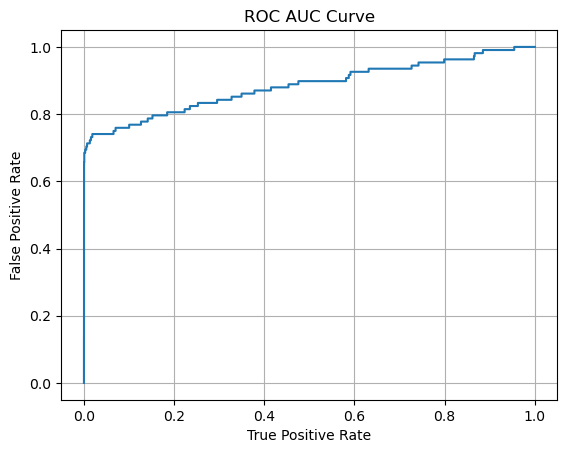

In [29]:
plt.title('ROC AUC Curve')
plt.plot(tpr,fpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.grid()
plt.show()

# Accuracy of the model is 99.89%